# **Project 1 : Data Visualization 491**
Ben Heinze, Elizabeth Pauley\
16 February 2024



## Database Information

* [PhD Dataset Information](https://vincentarelbundock.github.io/Rdatasets/doc/AER/PhDPublications.html)
* [Diamond Dataset Information](https://ggplot2.tidyverse.org/reference/diamonds.html)

## Helpful Links for personal use

* [Pandas Frame Documentation](https://pandas.pydata.org/docs/reference/frame.html)
* [Markdown Format Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
* [Joypy Ridgeline Cheatsheet](https://python-charts.com/distribution/ridgeline-plot-matplotlib/)

### Setup

Before we create any graphs, it's necessary to import our two data sets **phDPublications.csv** and **diamonds.csv** into our notebook:

In [1]:
import pandas as pd  
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt 
import joypy
phdPub = pd.read_csv("phDPublications.csv")
diamonds = pd.read_csv("diamonds.csv")

---

# **1. PhD Publication Data Set**
The *PhD Publication* data set will be the first one analyzed; We will look to answer three interesting questions by visualizing them with four different plots:

**1. Simple bar plot:** The number of articles published by a student compared to how many kids they have. 

**2. Grouped bar plot:** Illustrate the number of single men, single women, married men and married women and their individual correlation with how many articles their mentor has published. 

**3. Stacked bar plot:** Compare the prestige against single men, married men, single woman, and married woman.

**4. Box plot** Another visual for the prestige against single men, married men, single woman, and married woman.

## 1. Simple Bar Plot

Text(0, 0.5, 'Number of Articles Published')

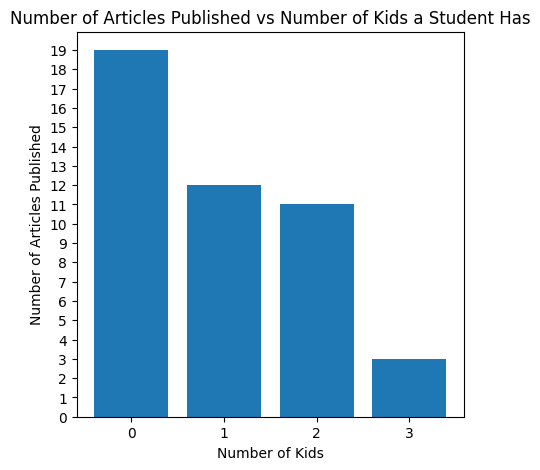

In [2]:
#1. Simple bar plot: The number of articles published by a student compared to how many kids they have
fig = plt.figure(figsize = (5,5))
ax = plt.axes()
ax.bar(phdPub['kids'], phdPub['articles'])
plt.xticks(np.arange(0,4,step=1))
plt.yticks(np.arange(0,20,step=1))
ax.set_title('Number of Articles Published vs Number of Kids a Student Has')
ax.set_xlabel("Number of Kids")
ax.set_ylabel("Number of Articles Published")

---

## 2. Grouped Bar Plot

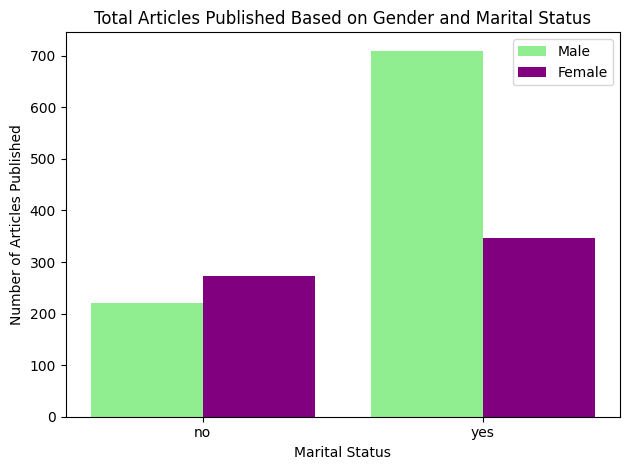

In [3]:
#2. Grouped bar plot: Illustrate the number of single men, single women, married men and married women and their individual correlation with how many articles their mentor has published.

# group by married and gender categories
# sum the values in the 'articles' column
# reset_index() reformats the dataframe to make it easier to access columns
# and perform future computations
groupedBarData = phdPub.groupby(['married', 'gender'])['articles'].sum().reset_index()
groupedBarData

male = groupedBarData[groupedBarData['gender'] =='male']
female = groupedBarData[groupedBarData['gender'] =='female']

x = np.arange(2)  # label locations
width = 0.40  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male['articles'], width, label='Male', color='lightgreen')
rects2 = ax.bar(x + width/2, female['articles'], width, label='Female', color='purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Articles Published')
ax.set_xlabel('Marital Status')
ax.set_title('Total Articles Published Based on Gender and Marital Status')
ax.set_xticks(x, male['married'])
ax.legend()

fig.tight_layout()

plt.show()

---

## 3. Stacked Bar Plot

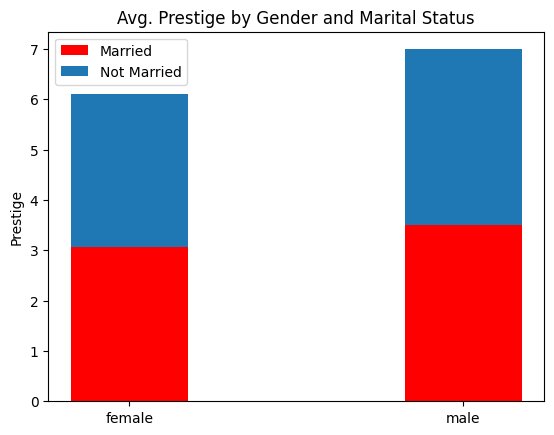

In [4]:
#3. Stacked bar plot: Compare the prestige against men, married men, women, and married women.

# group by married and gender categories
# calculate the average prestige value for each category
# reset_index() reformats the dataframe to make it easier to access columns
# and perform future computations
stackedBarData = phdPub.groupby(['married', 'gender'])['prestige'].mean().reset_index()
stackedBarData

married = stackedBarData[stackedBarData['married'] =='no']
notMarried = stackedBarData[stackedBarData['married'] =='yes']

width = 0.35      

fig, ax = plt.subplots()

ax.bar(married['gender'], married['prestige'], width, label='Married', color='red')
ax.bar(married['gender'], married['prestige'], width, married['prestige'],
       label='Not Married')

ax.set_ylabel('Prestige')
ax.set_title('Avg. Prestige by Gender and Marital Status')
ax.legend()

plt.show()

---

## 4. Box Plot

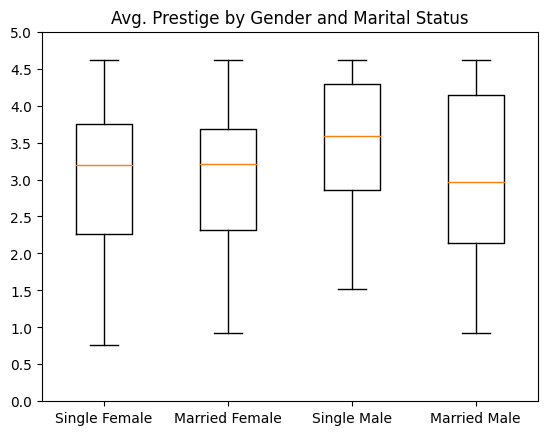

In [5]:
#2. Box Plot: Illustrate the number of single men, single women, married men and married women
#   and their individual correlation with how many articles their mentor has published.
'''
groupby sorts every combination of genders and marital status and divides them
into different dataframes. It returns an iterable of every df it created. 

Below, we created every combo of gender (m/f) and marital status (yes/no).
'''
groupData = phdPub.groupby(["gender", "married"])

labels=[]
plotData=[]
for (gender, married), group in groupData: 
    label = ("Married" if married == 'yes' else "Single") #label is marital status
    label += (" Female" if gender == 'female' else " Male") #appends gender
    labels.append(label)
    plotData.append(group["prestige"])
plt.boxplot(plotData, labels=labels)
plt.yticks(np.arange(0,5.5,step=0.5))
plt.title('Avg. Prestige by Gender and Marital Status')
plt.show()


---

# **2. Diamond Data Set**

Next, we will focus our attention on the *Diamond* data set. Questions to answer about the diamond dataset include:
1. The distribution of diamond prices (Histogram)
2. The density of each color of diamond compared to the price (Violin Plot)
3. Comparing the cubed volume (x \* y\* z) distribution for each cut type (Ridgeline Plot)

## 1. Distribution Plot

Text(0.5, 0.98, 'Distribution of Diamond Prices')

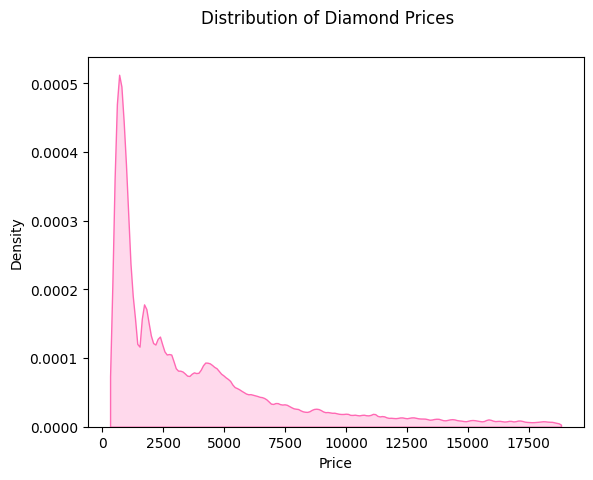

In [6]:
# adjust bandwidth with bw_adjust to make graph easier to read/interpret
sns.kdeplot(diamonds.price ,color='hotpink',fill=True, bw_adjust= .2, cut= 0)
plt.xlabel ('Price')
plt.suptitle('Distribution of Diamond Prices')

---

## 2. Violin Plot

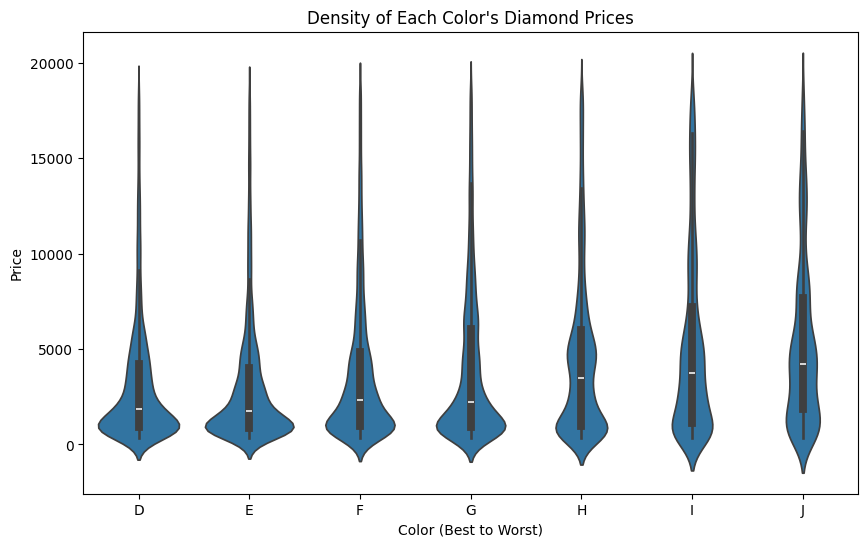

In [7]:
diamonds = pd.read_csv("diamonds.csv")

# Create violin plot
plt.figure(figsize=(10,6))
sns.violinplot(data=diamonds, x='color', y='price', order=sorted(diamonds['color'].unique()))

# Set labels and title
plt.xlabel('Color (Best to Worst)')
plt.ylabel('Price')
plt.title("Density of Each Color's Diamond Prices")

# Show the plot
plt.show()

---

## 3. Ridgeline Plot

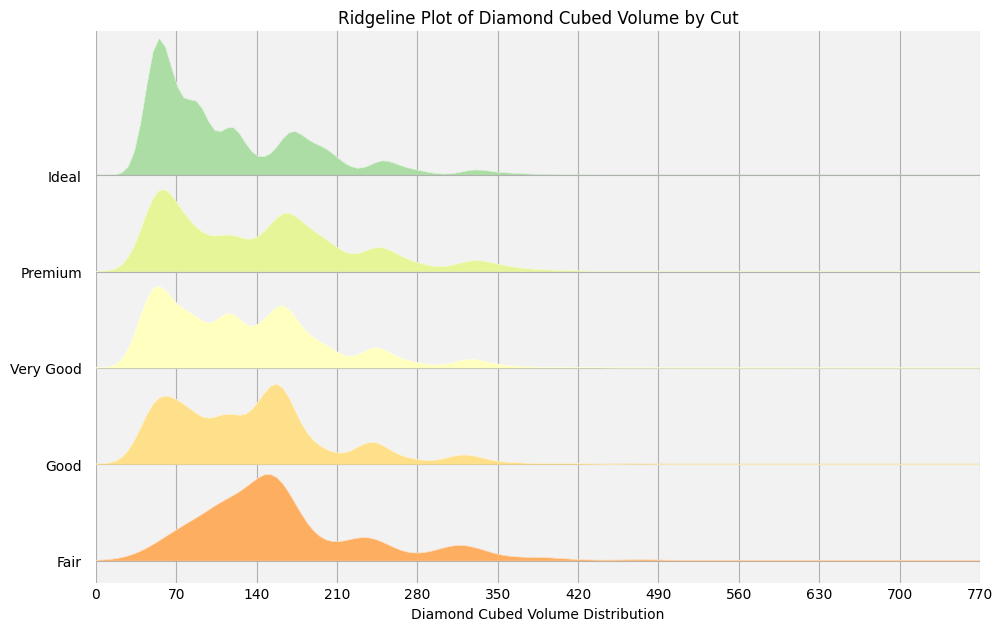

<Figure size 640x480 with 0 Axes>

In [10]:
# Add new 'cubed volume' column
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

colors = ["#FDAE61", "#FEE08B", "#FFFFBF", "#E6F598", "#ABDDA4"]
order = ["Fair", "Good", "Very Good", "Premium", "Ideal"] # order we want

#Realized the order of the 'colors' and 'order' list above were backwards... oops.
colors.reverse()
order.reverse()
'''
The following two lines of code are necesary for setting an order to 'cut'. Other ordering methods
weren't working so I reset the 'cut' column to be ordered categorical.

    line 1: We reassigned the 'cut' column to become an ordered categorical column. 
            - 'categories = order' assigns the order to the 'order' list above
            - 'ordered = true' assures the categorical variable is ordered.
    
    line 2: Sorts the values in the dataset to cut
            - 'inplace = true' tells pandas to modify the dataframe in place rather than
                returning a new dataframe with the resulted operation.
'''
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=order, ordered=True)
diamonds.sort_values('cut', inplace=True)

#upper bound for graph
limit = 700
# Creates ridgeline plot
fig, axes = joypy.joyplot(
    diamonds,
    by="cut",
    column="volume",
    figsize=(10, 6),
    linewidth=.3,
    linecolor="white",
    grid = True,
    color = colors, 
    background = "#f2f2f2" #gray background to make the yellow stand out more
)

# changes x-axis limit (xlim did not work when creating graph)
for ax in axes:
    ax.set_xlim(0, limit)
    ax.set_xticks(np.arange(0, limit+100, limit/10))

# Set titles and labels
plt.title("Ridgeline Plot of Diamond Cubed Volume by Cut")
axes[-1].set_xlabel("Diamond Cubed Volume Distribution") 
plt.show()

Most diamonds fall between the 0-400 cubed volume range, however, several outliers exist with the largest one striking a volume of 3840. These extreme outliers were cut from the graph due to their distribution not being visible in the distribution. Regardless, it is important to keep them in mind.

---

## **3. Recent news-source plots**

Next, we will evaluate amount and distribution data plots and their effectiveness to display data for the given question. It is important to stay mindful of the Trifecta Checkup framework to keep track of the question and goal the graph is attempting to visualize.

1. Cyber Attacks in the U.S.](https://usafacts.org/articles/how-many-cyber-attacks-occur-in-the-us/) (Amount dataplot)
2. Distribution dataplot (link here)

---

## 1. Amount Plot



<img src="cyberAttacks.png" alt="Alt Text" title="Cyber Attack Amounts in the US" width="610" height="600" />

#### [Cyber Attacks in the U.S.](https://usafacts.org/articles/how-many-cyber-attacks-occur-in-the-us/)

This graph intrigued me through its relevance and importance in computer science. Cyber security is a crucial aspect of keeping our personal data safe, and this graph visualizes how these types of attacks are becoming more prominant. 
    First, is the data used for this graph reliable and relevant? Since the data was sourced directly from the Federal Bureau of Investigation, companies often report cyber-attacks to them through the FBI's Internet Crime Complaint Center.
    The data is both relevant and accurate to the question the graph is trying to pose. Next, is that chart accurately projecting the data? This chart effectively represents the data: it clearly distinguishes each year, the y-axis begins at zero and increments every 200k until 800k which is roughly the peak, and each bar has the actual number of attacks from that year. Yes, the graph accurately represents the data provided. 
    Finally, does the graph pose a practical question and is there a story? Yes, cyber-attacks are becoming increasingly relevant with the shift in technology. The data illustrates an intresting story as well. We can see an enormous growth in number of attacks betwen 2019 and 2020. The pandemic occur March 2020; since the lockdowns, people heavily relied on technology for education, work, and social life. It is only natural for cyber-attacks to thrive in that environment. In 2022, we see a subtly decrease in attacks. This might be due to society's focus on technology loosening. 
    This graph is spectacular and I cannot imagine any improvements that could further benefit the data it is trying to represent.

---

## 2. Distribution Plot


<img src="summerTemps.png" alt="Overlapping desnsity plots comparing the distribution of temperatures during summer months (June-August) during the timelines of 1951-1980 and 2013-2023" title="Summer Temperatures" width="610" height="400" />

#### [It's Not Your Imagination. Summers Are Getting Hotter.](https://www.nytimes.com/interactive/2023/climate/extreme-summer-heat.html)

This visual seeks to address a very clear and practical question, which asks whether summers in the Northern Hemisphere are truly getting warmer, as seems to be the impression coming from many news sources as well as first-hand accounts of individuals living in this region. The graph's data is not only relevant with values being displayed through the year 2023, but the data comes from a very reliable news source, the Goddard Institute for Space Studies (GISS) Surface Temperature Analysis. GISS is a part of NASA, and therefore a quite trustworthy source.
    This visual strongly supports the article's title, as it is clear that much of the distribution has shifted to the far right temperatures, with a much greater portion of the temperature distribution being in the "Extremely hot" category. Overall, this visual tells the story that summer temperatures have clearly been shifting upwards over the past 73 years.
    These overlapped density plots are well-explained with labels and easy to understand with the aid of other aesthetics, as well. The colors blue, gray, orange, and red are used to distinguish four categories of temperature: cold, normal, hot, and extremely hot. These colors are well-chosen to match colors people likely associate with the described temperature categories, or can at least intuitively come to understand when looking at what the graph is trying to convey. Additionally, the reader's attention is drawn to the most recent years by coloring the range of 2013-2023, while the oldest time range (1951-1980) remains gray. A label on the left also explains that, the higher the density plot goes, the more frequent values in that range are.
    One change to this visual that might make the plot communicate its message even better would be to include the general range of temperature values that each temperature category is associated with, so that people could have a better idea of what "extremely hot" means, for example. However, the graph in general does a great job at communicating its purpose in a way that is easy for audiences to understand.